In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('data/Loan_Default.csv')

In [3]:
print('Shape:',df.shape)

Shape: (152272, 34)


In [4]:
print('Columns:',df.columns)

Columns: Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


In [5]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


### Preprocessing and EDS

#### Helper Functions

In [6]:
def chi_square_test(variable1, variable2 = 'Status', data = df, alpha=0.05):
    
    contingency_table = pd.crosstab(data[variable1], data[variable2])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Determine whether to reject the null hypothesis
    if p < alpha:
        print(f"Reject the null hypothesis. There is a significant association between {variable1} and {variable2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {variable1} and {variable2}.")


In [7]:
def one_way_anova(variable1, variable2='Status', data=df, alpha=0.05):
    
    groups = [data[data[variable2] == category][variable1] for category in data[variable2].unique()]
    
    f_statistic, p_value = f_oneway(*groups)
    
    if p_value < alpha:
        print(f"Reject the null hypothesis. There is a significant difference in {variable1} across {variable2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant difference in {variable1} across {variable2}.")



In [8]:
def is_na(variable, data=df):
    print(f'Total Na Values for {variable} is {sum(data[variable].isna())}')

In [9]:
def fillna_numerical(variable1, variable2='Status', data=df):
    group_means = data.groupby(variable2)[variable1].transform('mean')
    data[variable1] = data[variable1].fillna(group_means)
    return data

In [10]:
def crosstab(variable1, variable2 = 'Status', data = df):
    print(pd.crosstab(data[variable1], data[variable2]))

In [11]:
def variable_count(variable, data=df):
    print('Variable Count for each feature:')
    print(df.groupby(variable)[variable].count())

In [12]:
def bar_plot(variable, data=df):
    plt.figure(figsize=(8, 6))
    data[variable].value_counts().plot(kind='bar')
    plt.title('Bar Plot (Matplotlib)')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

In [13]:
def group_by_count(variable, data=df):
    print(data.groupby(variable)[variable].count())

In [14]:
def get_dummies(variable, data=df):
    dummy_df = pd.get_dummies(data[variable], prefix=variable, drop_first=True, dtype=float) 
    data_with_dummies = pd.concat([data, dummy_df], axis=1)
    data_with_dummies.drop(columns=[variable], inplace=True)
    return data_with_dummies

In [15]:
def centered(varaible, data=df):
    mean = data[varaible].mean()
    data[varaible] = data[varaible]-mean
    return data

In [16]:
def scaled(variable, data=df):
    std = data[variable].std()
    data[variable] = data[variable]/std
    return data

In [17]:
def standardize(varaible, data=df):
    data = centered(varaible, data=df)
    data = scaled(varaible, data=df)
    return data

In [18]:
def plot_pdf(variable, data=df):
    plt.hist(data[variable], bins=30, density=True, alpha=0.7)
    plt.title('Density Plot ('+variable+')')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [19]:
def box_plot(variable1, variable2='Status', data=df):
    sns.boxplot(x = data[variable2], y = data[variable1])
    plt.title('Box Plot Example')
    plt.xlabel(variable2)
    plt.ylabel(variable1)
    plt.show()

In [20]:
numerical_varibles = []
categorical_varibles = []
binary_varibles = []

#### Dropping Duplicates

In [21]:
df.shape

(152272, 34)

In [22]:
df = df.drop_duplicates().reset_index(drop=True)

In [23]:
df.shape

(148670, 34)

#### Status

In [24]:
df['Status'].nunique()

2

In [25]:
variable_count('Status', data=df)

Variable Count for each feature:
Status
0    112031
1     36639
Name: Status, dtype: int64


* Dataset is highly imbalanced.

In [26]:
is_na('Status', data=df)

Total Na Values for Status is 0


#### ID

In [27]:
df['ID'].nunique()

148670

* As number of unique IDs is equal to number of records, there is no need for this varible we can drop this column. 

In [28]:
df.drop(columns=['ID'], inplace=True)

#### year

In [29]:
df['year'].nunique()

1

* As number of year is equal to 1, that means the column is nor varying at all. So, we can drop the column.

In [30]:
df.drop(columns=['year'], inplace=True)

#### Loan Limit

In [31]:
df['loan_limit'].nunique()

2

In [32]:
group_by_count('loan_limit', data=df)

loan_limit
cf     135348
ncf      9978
Name: loan_limit, dtype: int64


In [33]:
is_na('loan_limit', data=df)

Total Na Values for loan_limit is 3344


In [34]:
crosstab('loan_limit', data=df)

Status           0      1
loan_limit               
cf          102904  32444
ncf           6664   3314


In [35]:
df['loan_limit'] = df['loan_limit'].fillna(df['loan_limit'].mode()[0])

In [36]:
is_na('loan_limit', data=df)

Total Na Values for loan_limit is 0


In [37]:
chi_square_test('loan_limit', data=df)

Reject the null hypothesis. There is a significant association between loan_limit and Status.


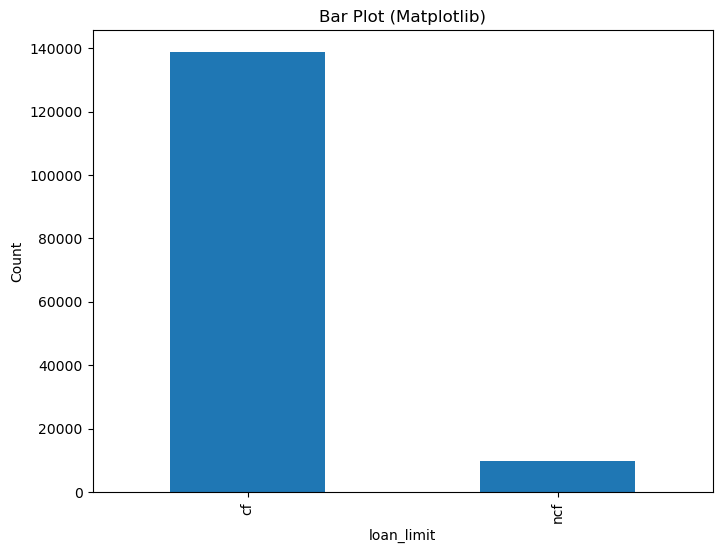

In [38]:
bar_plot('loan_limit', data=df)

In [39]:
df['loan_limit'] = df['loan_limit'].replace({'cf':1,'ncf':0})

In [40]:
binary_varibles.append('loan_limit')

#### Gender

In [41]:
df['Gender'].nunique()

4

In [42]:
group_by_count('Gender', data=df)

Gender
Female               27266
Joint                41399
Male                 42346
Sex Not Available    37659
Name: Gender, dtype: int64


In [43]:
is_na('Gender', data=df)

Total Na Values for Gender is 0


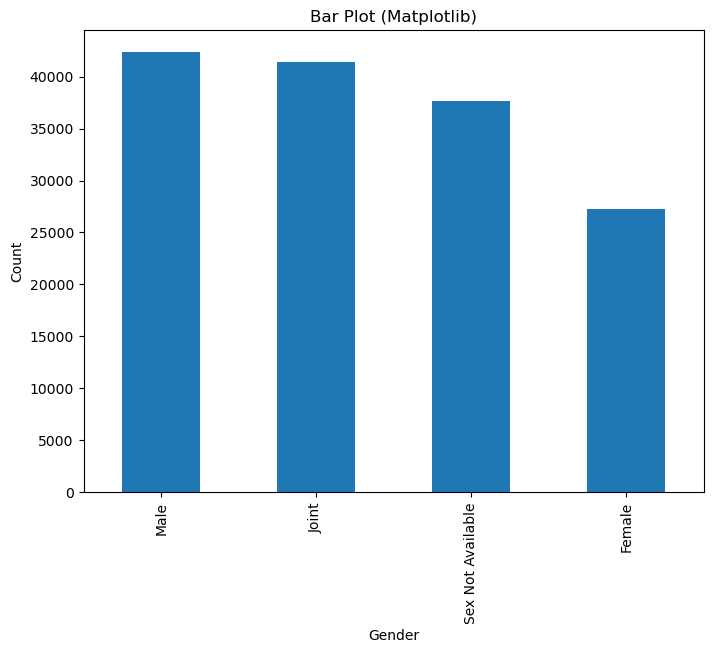

In [44]:
bar_plot('Gender', data=df)

In [45]:
chi_square_test('Gender', data=df)

Reject the null hypothesis. There is a significant association between Gender and Status.


In [46]:
crosstab('Gender', data=df)

Status                 0      1
Gender                         
Female             20418   6848
Joint              33466   7933
Male               31255  11091
Sex Not Available  26892  10767


In [47]:
df = get_dummies('Gender', data=df)

In [48]:
categorical_varibles.append('Gender')

#### Approve In Advance

In [49]:
df['approv_in_adv'].nunique()

2

In [50]:
is_na('approv_in_adv', data=df)

Total Na Values for approv_in_adv is 908


In [51]:
df['approv_in_adv'] = df['approv_in_adv'].fillna(df['approv_in_adv'].mode()[0])

In [52]:
is_na('approv_in_adv', data=df)

Total Na Values for approv_in_adv is 0


In [53]:
group_by_count('approv_in_adv', data=df)

approv_in_adv
nopre    125529
pre       23141
Name: approv_in_adv, dtype: int64


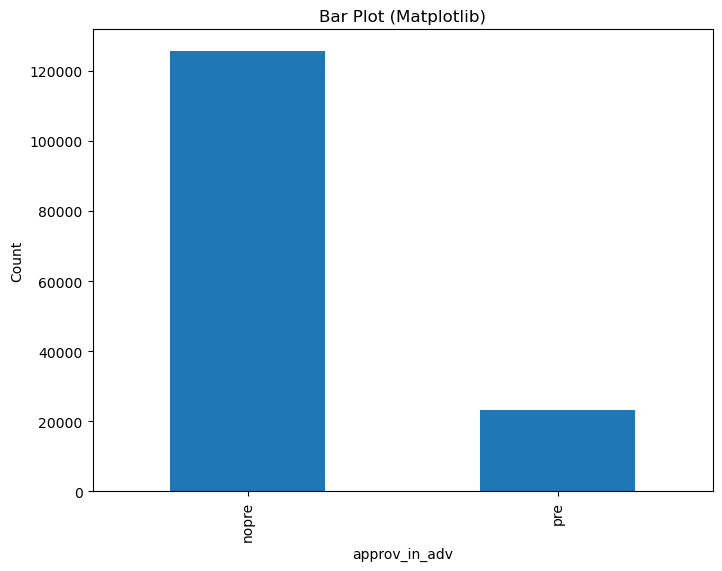

In [54]:
bar_plot('approv_in_adv', data=df)

In [55]:
chi_square_test('approv_in_adv', data=df)

Reject the null hypothesis. There is a significant association between approv_in_adv and Status.


In [56]:
crosstab('approv_in_adv', data=df)

Status             0      1
approv_in_adv              
nopre          93725  31804
pre            18306   4835


In [57]:
df['approv_in_adv'] = df['approv_in_adv'].replace({'nopre':1,'pre':0})

In [58]:
binary_varibles.append('approv_in_adv')

#### Loan Type

In [59]:
df['loan_type'].nunique()

3

In [60]:
is_na('loan_type', data=df)

Total Na Values for loan_type is 0


In [61]:
group_by_count('loan_type', data=df)

loan_type
type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64


In [62]:
crosstab('loan_type', data=df)

Status         0      1
loan_type              
type1      87398  25775
type2      13590   7172
type3      11043   3692


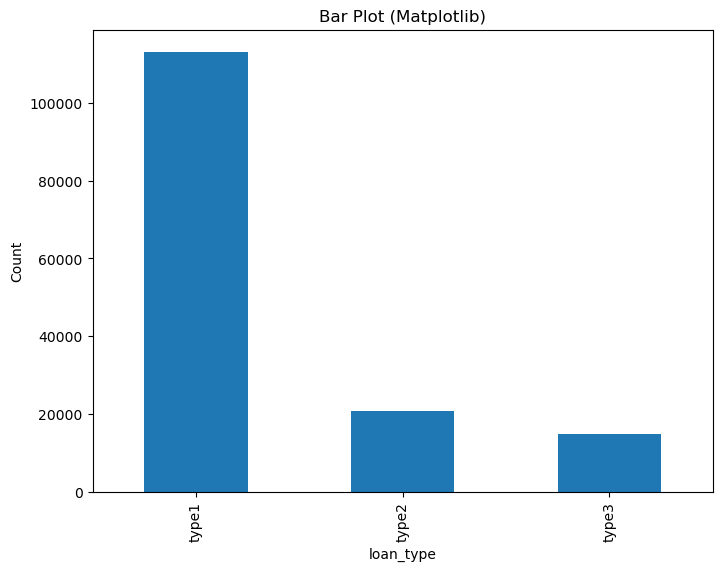

In [63]:
bar_plot('loan_type', data=df)

In [64]:
chi_square_test('loan_type', data=df)

Reject the null hypothesis. There is a significant association between loan_type and Status.


In [65]:
df = get_dummies('loan_type', data=df)

In [66]:
categorical_varibles.append('loan_type')

#### Loan Purpose

In [67]:
df['loan_purpose'].nunique()

4

In [68]:
is_na('loan_purpose', data=df)

Total Na Values for loan_purpose is 134


In [69]:
df['loan_purpose'] = df['loan_purpose'].fillna(df['loan_purpose'].mode()[0])

In [70]:
is_na('loan_purpose', data=df)

Total Na Values for loan_purpose is 0


In [71]:
group_by_count('loan_purpose', data=df)

loan_purpose
p1    34529
p2     3274
p3    56068
p4    54799
Name: loan_purpose, dtype: int64


In [72]:
crosstab('loan_purpose')

Status            0      1
loan_purpose              
p1            26196   9125
p2             2232   1110
p3            43003  14355
p4            43203  12913


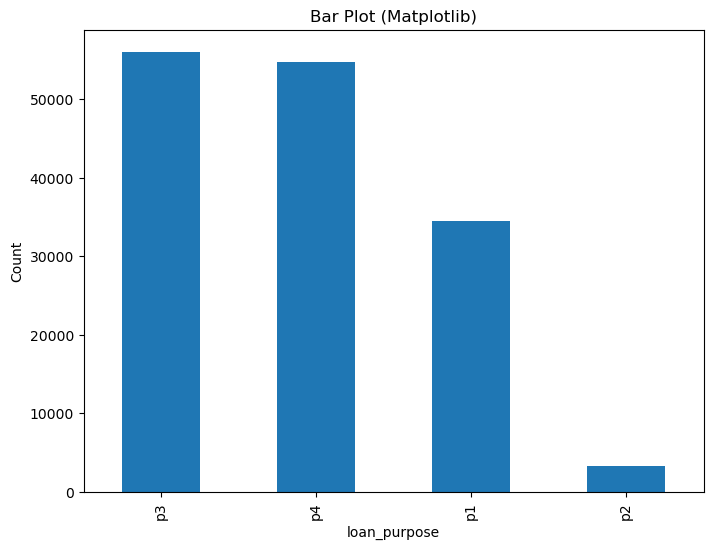

In [73]:
bar_plot('loan_purpose', data=df)

In [74]:
chi_square_test('loan_purpose', data=df)

Reject the null hypothesis. There is a significant association between loan_purpose and Status.


In [75]:
df = get_dummies('loan_purpose', data=df)

In [76]:
categorical_varibles.append('loan_purpose')

#### Credit Worthiness

In [77]:
df['Credit_Worthiness'].nunique()

2

In [78]:
is_na('Credit_Worthiness', data=df)

Total Na Values for Credit_Worthiness is 0


In [79]:
group_by_count('Credit_Worthiness', data=df)

Credit_Worthiness
l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64


In [80]:
crosstab('Credit_Worthiness', data=df)

Status                  0      1
Credit_Worthiness               
l1                 107715  34629
l2                   4316   2010


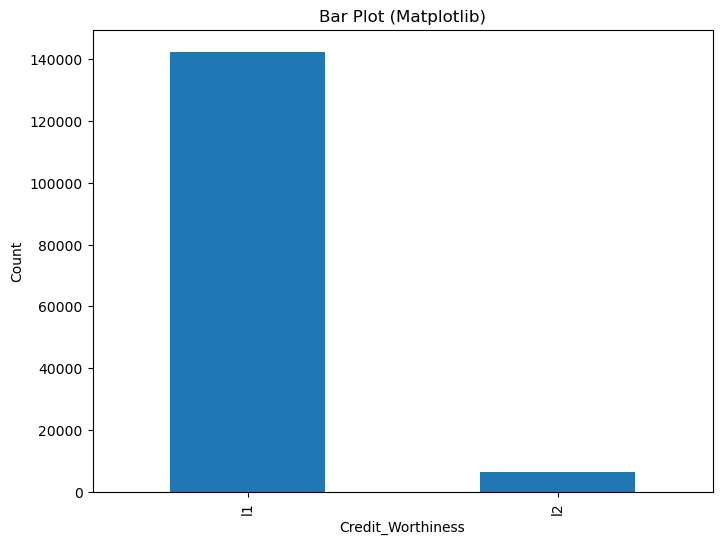

In [81]:
bar_plot('Credit_Worthiness', data=df)

In [82]:
chi_square_test('Credit_Worthiness', data=df)

Reject the null hypothesis. There is a significant association between Credit_Worthiness and Status.


In [83]:
df['Credit_Worthiness'] = df['Credit_Worthiness'].replace({'l1':1,'l2':0})

In [84]:
binary_varibles.append('Credit_Worthiness')

#### Open Credit

In [85]:
df['open_credit'].nunique()

2

In [86]:
is_na('open_credit', data=df)

Total Na Values for open_credit is 0


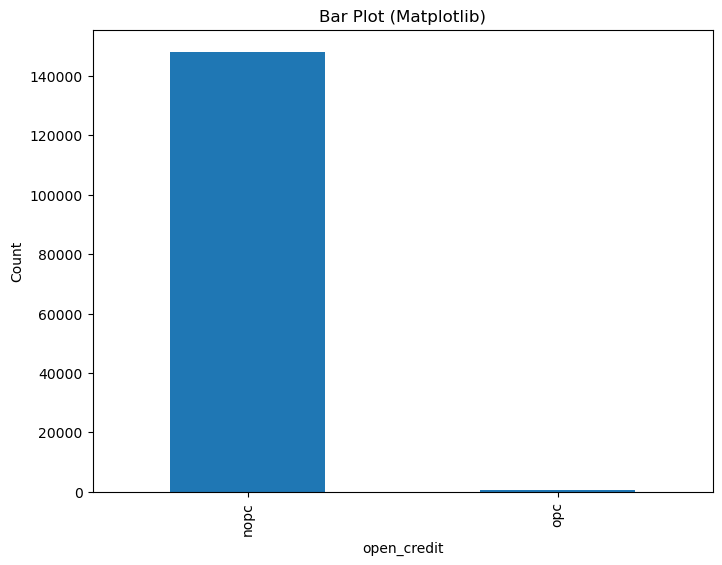

In [87]:
bar_plot('open_credit', data=df)

In [88]:
group_by_count('open_credit', data=df)

open_credit
nopc    148114
opc        556
Name: open_credit, dtype: int64


In [89]:
crosstab('open_credit', data=df)

Status            0      1
open_credit               
nopc         111573  36541
opc             458     98


In [90]:
chi_square_test('open_credit', data=df)

Reject the null hypothesis. There is a significant association between open_credit and Status.


In [91]:
df['open_credit'] = df['open_credit'].replace({'nopc':1,'opc':0})

In [92]:
binary_varibles.append('open_credit')

#### Business Or Commercial

In [93]:
df['business_or_commercial'].nunique()

2

In [94]:
is_na('business_or_commercial', data=df)

Total Na Values for business_or_commercial is 0


In [95]:
group_by_count('business_or_commercial', data=df)

business_or_commercial
b/c       20762
nob/c    127908
Name: business_or_commercial, dtype: int64


In [96]:
crosstab('business_or_commercial', data=df)

Status                      0      1
business_or_commercial              
b/c                     13590   7172
nob/c                   98441  29467


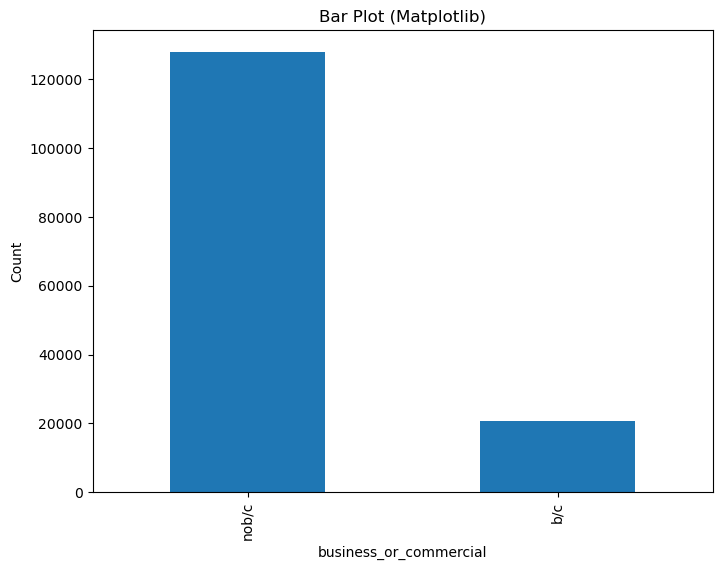

In [97]:
bar_plot('business_or_commercial', data=df)

In [98]:
chi_square_test('business_or_commercial', data=df)

Reject the null hypothesis. There is a significant association between business_or_commercial and Status.


In [99]:
df['business_or_commercial'] = df['business_or_commercial'].replace({'nob/c':1,'b/c':0})

In [100]:
binary_varibles.append('business_or_commercial')

#### Loan Amount

In [101]:
df['loan_amount'].describe()

count    1.486700e+05
mean     3.311177e+05
std      1.839093e+05
min      1.650000e+04
25%      1.965000e+05
50%      2.965000e+05
75%      4.365000e+05
max      3.576500e+06
Name: loan_amount, dtype: float64

In [102]:
is_na('loan_amount', data=df)

Total Na Values for loan_amount is 0


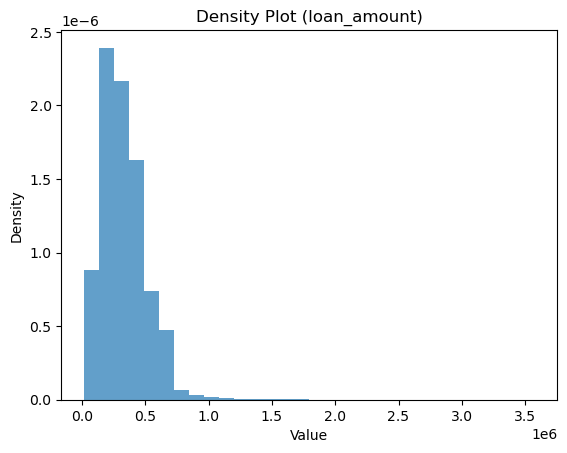

In [103]:
plot_pdf('loan_amount', data=df)

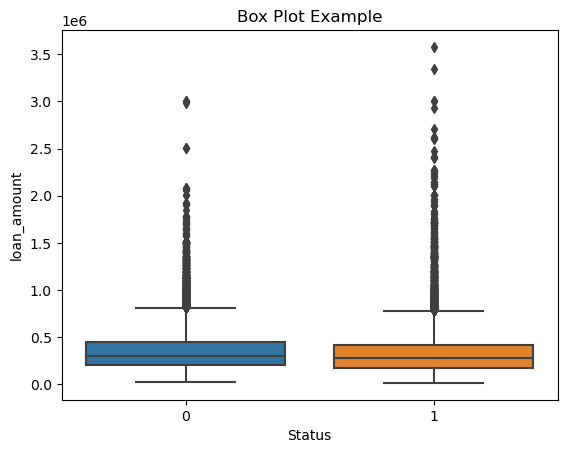

In [104]:
box_plot('loan_amount', data=df)

In [105]:
one_way_anova('loan_amount', data=df)

Reject the null hypothesis. There is a significant difference in loan_amount across Status.


In [106]:
df = standardize('loan_amount', data=df)

In [107]:
numerical_varibles.append('loan_amount')

#### Rate Of Interest

In [108]:
is_na('rate_of_interest', data=df)

Total Na Values for rate_of_interest is 36439


In [109]:
df = fillna_numerical('rate_of_interest', data=df)

In [110]:
is_na('rate_of_interest', data=df)

Total Na Values for rate_of_interest is 0


In [111]:
df['rate_of_interest'].describe()

count    148670.000000
mean          4.120237
std           0.505103
min           0.000000
25%           3.750000
50%           4.250000
75%           4.350500
max           8.000000
Name: rate_of_interest, dtype: float64

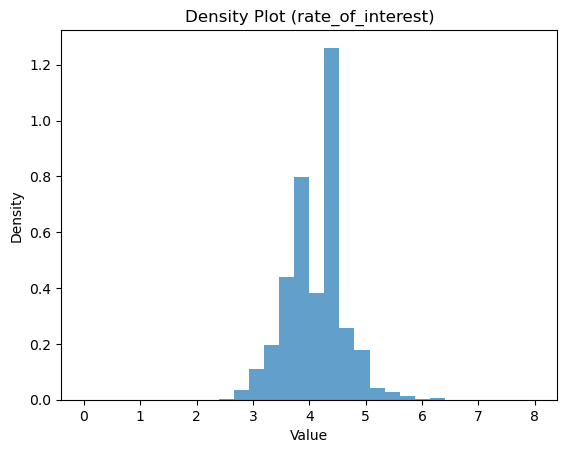

In [112]:
plot_pdf('rate_of_interest', data=df)

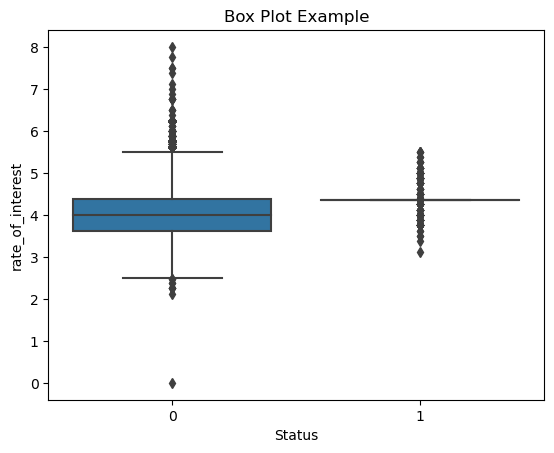

In [113]:
box_plot('rate_of_interest', data=df)

In [114]:
one_way_anova('rate_of_interest', data=df)

Reject the null hypothesis. There is a significant difference in rate_of_interest across Status.


In [115]:
df = standardize('rate_of_interest', data=df)

In [116]:
numerical_varibles.append('rate_of_interest')

#### Interest Rate Spread

In [117]:
is_na('Interest_rate_spread', data=df)

Total Na Values for Interest_rate_spread is 36639


In [118]:
df['Interest_rate_spread'] = df['Interest_rate_spread'].fillna(value=df['Interest_rate_spread'].mean())

In [119]:
is_na('Interest_rate_spread', data=df)

Total Na Values for Interest_rate_spread is 0


In [120]:
df['Interest_rate_spread'].describe()

count    148670.000000
mean          0.441656
std           0.445359
min          -3.638000
25%           0.181500
50%           0.441656
75%           0.620000
max           3.357000
Name: Interest_rate_spread, dtype: float64

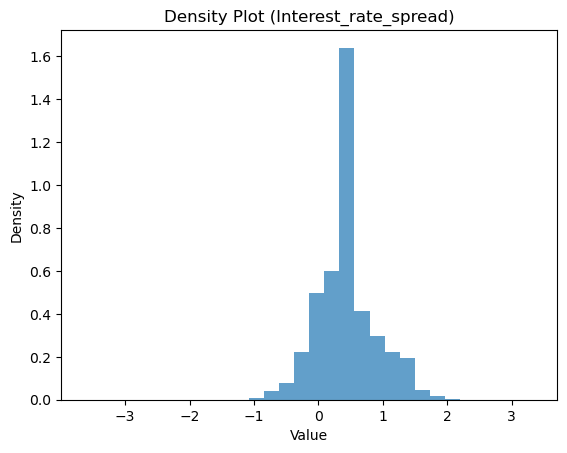

In [121]:
plot_pdf('Interest_rate_spread', data=df)

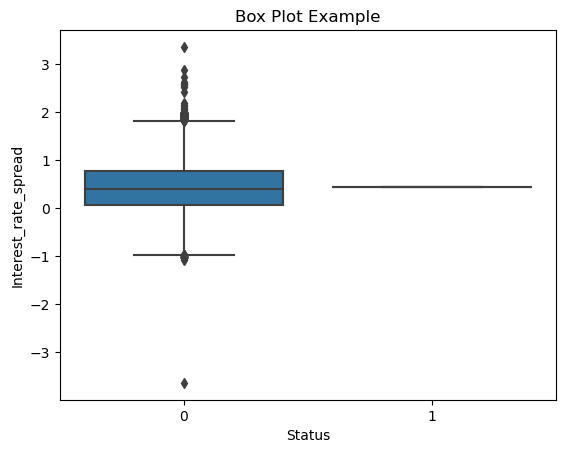

In [122]:
box_plot('Interest_rate_spread', data=df)

In [123]:
one_way_anova('Interest_rate_spread', data=df)

Fail to reject the null hypothesis. There is no significant difference in Interest_rate_spread across Status.


* Hence we will drop the column.

In [124]:
df.drop(columns=['Interest_rate_spread'], inplace=True)

#### Upfront Charges

In [125]:
is_na('Upfront_charges', data=df)

Total Na Values for Upfront_charges is 39642


In [126]:
df = fillna_numerical('Upfront_charges', data=df)

In [127]:
is_na('Upfront_charges', data=df)

Total Na Values for Upfront_charges is 0


In [128]:
df['Upfront_charges'].describe()

count    148670.000000
mean       2817.714396
std        2874.298982
min           0.000000
25%        1250.000000
50%        1565.237974
75%        3889.495000
max       60000.000000
Name: Upfront_charges, dtype: float64

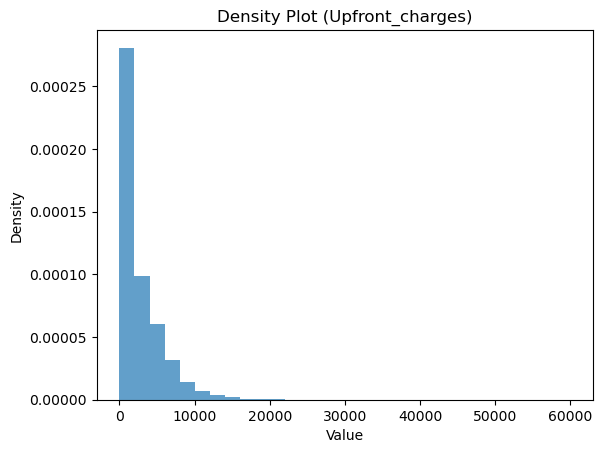

In [129]:
plot_pdf('Upfront_charges', data=df)

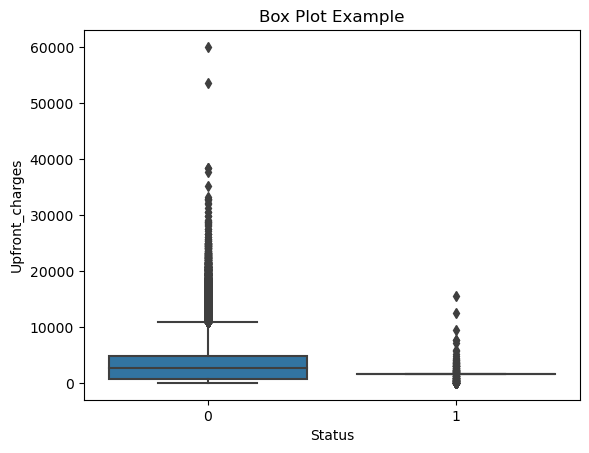

In [130]:
box_plot('Upfront_charges', data=df)

In [131]:
one_way_anova('Upfront_charges', data=df)

Reject the null hypothesis. There is a significant difference in Upfront_charges across Status.


In [132]:
df = standardize('Upfront_charges', data=df)

In [133]:
numerical_varibles.append('Upfront_charges')

#### Term

In [134]:
df['term'].nunique()

26

In [135]:
is_na('term', data=df)

Total Na Values for term is 41


In [136]:
df['term'] = df['term'].fillna(value=df['term'].mode()[0])

In [137]:
is_na('term', data=df)

Total Na Values for term is 0


In [138]:
crosstab('term', data=df)

Status      0      1
term                
96.0      154     40
108.0      28      5
120.0     417     93
132.0      67     26
144.0     217     46
156.0     141     33
165.0       0      1
168.0      64     18
180.0    9827   3154
192.0      15      2
204.0      43     16
216.0      89     26
228.0      56     18
240.0    4639   1220
252.0       8      0
264.0      36      7
276.0      73     27
280.0       0      1
288.0      77     13
300.0    1226   1596
312.0     155     30
322.0       1      0
324.0    2063    703
336.0     174     39
348.0     207     53
360.0   92254  29472


In [139]:
variable_count('term', data=df)

Variable Count for each feature:
term
96.0        194
108.0        33
120.0       510
132.0        93
144.0       263
156.0       174
165.0         1
168.0        82
180.0     12981
192.0        17
204.0        59
216.0       115
228.0        74
240.0      5859
252.0         8
264.0        43
276.0       100
280.0         1
288.0        90
300.0      2822
312.0       185
322.0         1
324.0      2766
336.0       213
348.0       260
360.0    121726
Name: term, dtype: int64


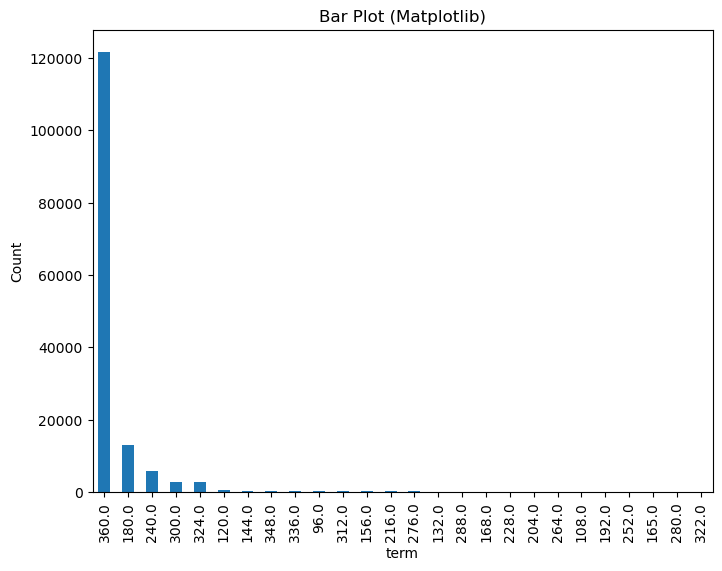

In [140]:
bar_plot('term', data=df)

In [141]:
chi_square_test('term', data=df)

Reject the null hypothesis. There is a significant association between term and Status.


In [142]:
df = get_dummies('term', data=df)

In [143]:
categorical_varibles.append('term')

#### Neg Ammortization

In [144]:
df['Neg_ammortization'].nunique()

2

In [145]:
is_na('Neg_ammortization', data=df)

Total Na Values for Neg_ammortization is 121


In [146]:
df['Neg_ammortization'] = df['Neg_ammortization'].fillna(value=df['Neg_ammortization'].mode()[0])

In [147]:
is_na('Neg_ammortization', data=df)

Total Na Values for Neg_ammortization is 0


In [148]:
group_by_count('Neg_ammortization', data=df)

Neg_ammortization
neg_amm     15129
not_neg    133541
Name: Neg_ammortization, dtype: int64


In [149]:
crosstab('Neg_ammortization', data=df)

Status                  0      1
Neg_ammortization               
neg_amm              8382   6747
not_neg            103649  29892


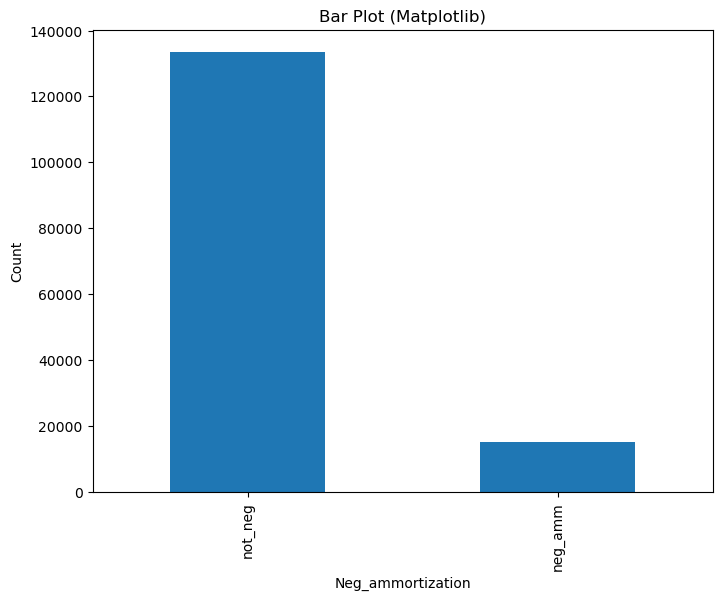

In [150]:
bar_plot('Neg_ammortization', data=df)

In [151]:
chi_square_test('Neg_ammortization', data=df)

Reject the null hypothesis. There is a significant association between Neg_ammortization and Status.


In [152]:
df['Neg_ammortization'] = df['Neg_ammortization'].replace({'not_neg':1, 'neg_amm':0})

In [153]:
binary_varibles.append('Neg_ammortization')

#### Interest Only

In [154]:
df['interest_only'].nunique()

2

In [155]:
is_na('interest_only', data=df)

Total Na Values for interest_only is 0


In [156]:
group_by_count('interest_only', data=df)

interest_only
int_only      7110
not_int     141560
Name: interest_only, dtype: int64


In [157]:
crosstab('interest_only', data=df)

Status              0      1
interest_only               
int_only         5168   1942
not_int        106863  34697


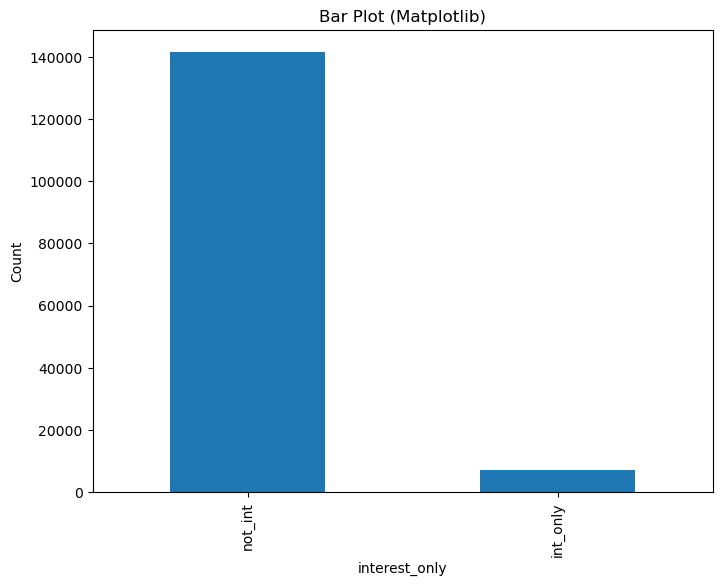

In [158]:
bar_plot('interest_only', data=df)

In [159]:
chi_square_test('interest_only', data=df)

Reject the null hypothesis. There is a significant association between interest_only and Status.


In [160]:
df['interest_only'] = df['interest_only'].replace({'not_int':0, 'int_only':1})

In [161]:
binary_varibles.append('interest_only')

#### Lump Sum Payment

In [162]:
df['lump_sum_payment'].nunique()

2

In [163]:
is_na('lump_sum_payment', data=df)

Total Na Values for lump_sum_payment is 0


In [164]:
variable_count('lump_sum_payment', data=df)

Variable Count for each feature:
lump_sum_payment
lpsm          3384
not_lpsm    145286
Name: lump_sum_payment, dtype: int64


In [165]:
crosstab('lump_sum_payment', data=df)

Status                 0      1
lump_sum_payment               
lpsm                 756   2628
not_lpsm          111275  34011


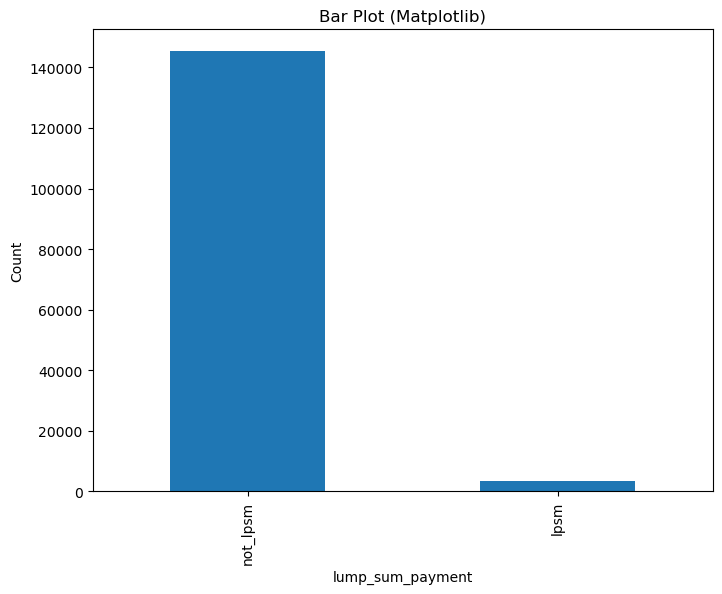

In [166]:
bar_plot('lump_sum_payment', data=df)

In [167]:
chi_square_test('lump_sum_payment', data=df)

Reject the null hypothesis. There is a significant association between lump_sum_payment and Status.


In [168]:
df['lump_sum_payment'] = df['lump_sum_payment'].replace({'not_lpsm':0, 'lpsm':1})

In [169]:
binary_varibles.append('lump_sum_payment')

#### Property Value

In [170]:
is_na('property_value', data=df)

Total Na Values for property_value is 15098


In [171]:
df = fillna_numerical('property_value', data=df)

In [172]:
is_na('property_value', data=df)

Total Na Values for property_value is 0


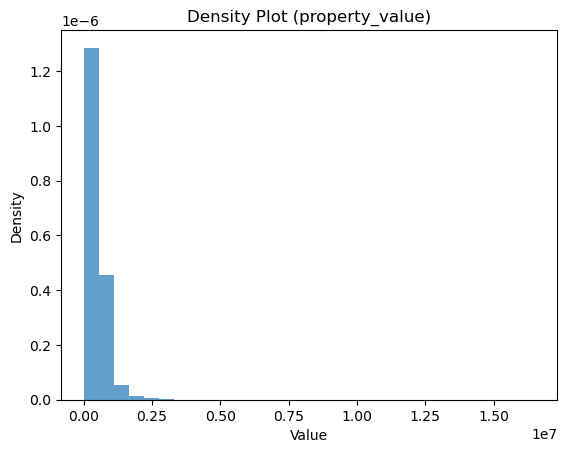

In [173]:
plot_pdf('property_value', data=df)

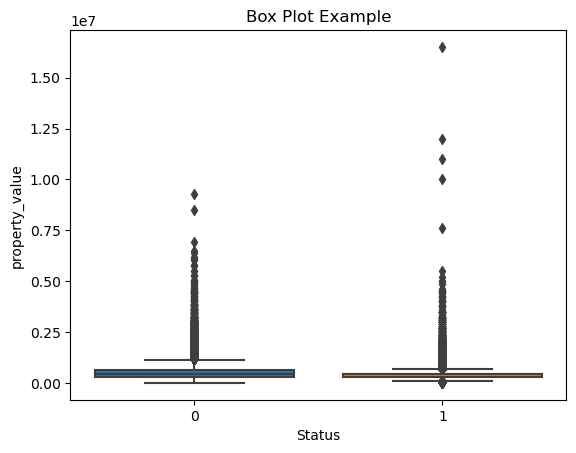

In [174]:
box_plot('property_value', data=df)

In [175]:
one_way_anova('property_value', data=df)

Reject the null hypothesis. There is a significant difference in property_value across Status.


In [176]:
df = standardize('property_value', data=df)

In [177]:
numerical_varibles.append('property_value')

#### Construction Type

In [178]:
df['construction_type'].nunique()

2

In [179]:
is_na('construction_type', data=df)

Total Na Values for construction_type is 0


In [180]:
variable_count('construction_type', data=df)

Variable Count for each feature:
construction_type
mh        33
sb    148637
Name: construction_type, dtype: int64


In [181]:
crosstab('construction_type', data=df)

Status                  0      1
construction_type               
mh                      0     33
sb                 112031  36606


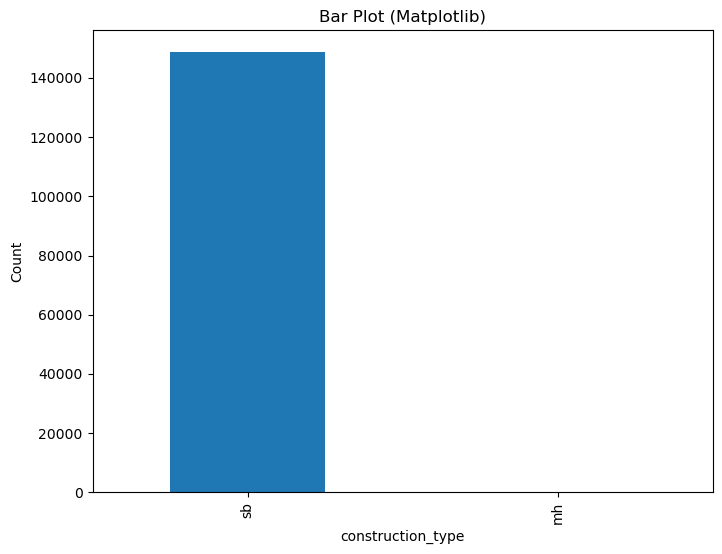

In [182]:
bar_plot('construction_type', data=df)

In [183]:
chi_square_test('construction_type', data=df)

Reject the null hypothesis. There is a significant association between construction_type and Status.


In [184]:
df['construction_type'] = df['construction_type'].replace({'sb':1, 'mh':0})

In [185]:
binary_varibles.append('construction_type')

#### Occupancy Type

In [186]:
df['occupancy_type'].nunique()

3

In [187]:
is_na('occupancy_type', data=df)

Total Na Values for occupancy_type is 0


In [188]:
variable_count('occupancy_type', data=df)

Variable Count for each feature:
occupancy_type
ir      7340
pr    138201
sr      3129
Name: occupancy_type, dtype: int64


In [189]:
crosstab('occupancy_type', data=df)

Status               0      1
occupancy_type               
ir                5139   2201
pr              104612  33589
sr                2280    849


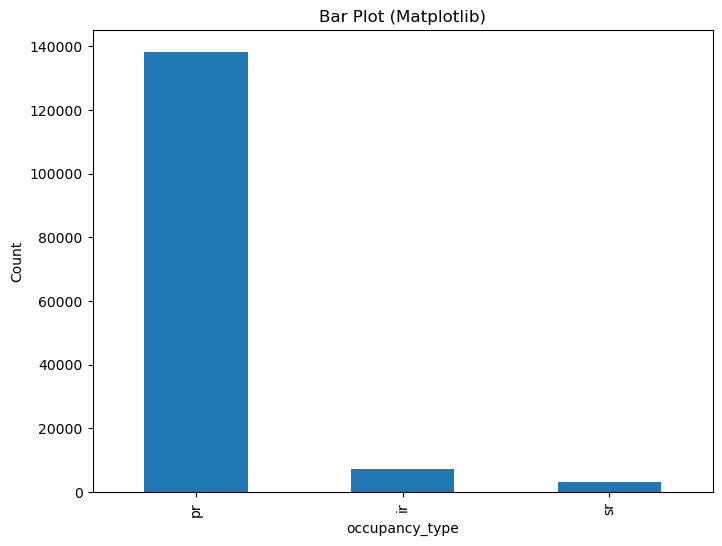

In [190]:
bar_plot('occupancy_type', data=df)

In [191]:
chi_square_test('occupancy_type', data=df)

Reject the null hypothesis. There is a significant association between occupancy_type and Status.


In [192]:
df = get_dummies('occupancy_type', data=df)

In [193]:
categorical_varibles.append('occupancy_type')

#### Secured By

In [194]:
df['Secured_by'].nunique()

2

In [195]:
is_na('Secured_by', data=df)

Total Na Values for Secured_by is 0


In [196]:
variable_count('Secured_by', data=df)

Variable Count for each feature:
Secured_by
home    148637
land        33
Name: Secured_by, dtype: int64


In [197]:
crosstab('Secured_by', data=df)

Status           0      1
Secured_by               
home        112031  36606
land             0     33


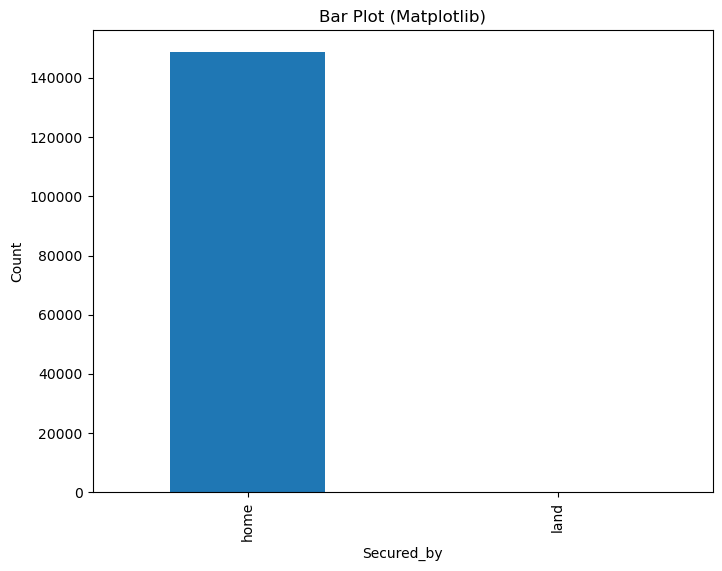

In [198]:
bar_plot('Secured_by', data=df)

In [199]:
chi_square_test('Secured_by', data=df)

Reject the null hypothesis. There is a significant association between Secured_by and Status.


In [200]:
df['Secured_by'] = df['Secured_by'].replace({'home': 0, 'land':1})

In [201]:
binary_varibles.append('Secured_by')

#### Total Units

In [202]:
df['total_units'].nunique()

4

In [203]:
is_na('total_units', data=df)

Total Na Values for total_units is 0


In [204]:
variable_count('total_units', data=df)

Variable Count for each feature:
total_units
1U    146480
2U      1477
3U       393
4U       320
Name: total_units, dtype: int64


In [205]:
crosstab('total_units', data=df)

Status            0      1
total_units               
1U           110597  35883
2U              967    510
3U              242    151
4U              225     95


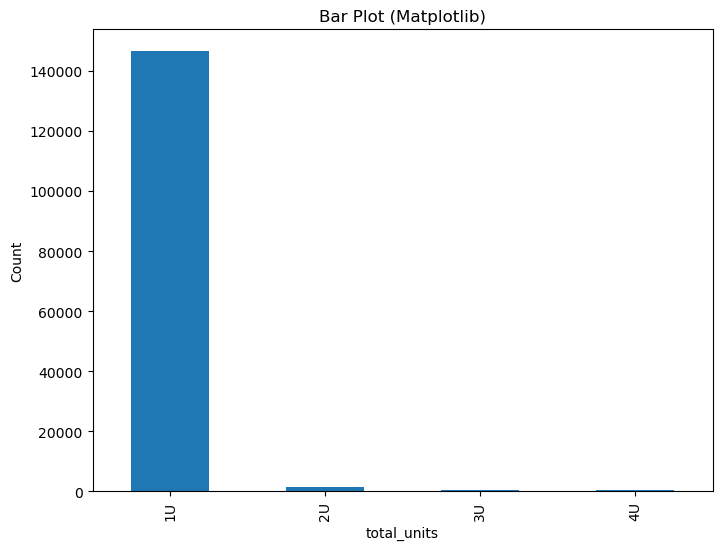

In [206]:
bar_plot('total_units', data=df)

In [207]:
chi_square_test('total_units', data=df)

Reject the null hypothesis. There is a significant association between total_units and Status.


In [208]:
df = get_dummies('total_units', data=df)

In [209]:
categorical_varibles.append('total_units')

#### Income

In [210]:
is_na('income', data=df)

Total Na Values for income is 9150


In [211]:
df = fillna_numerical('income', data=df)

In [212]:
is_na('income', data=df)

Total Na Values for income is 0


In [213]:
df['income'].describe()

count    148670.000000
mean       6964.418410
std        6294.093766
min           0.000000
25%        3840.000000
50%        6000.000000
75%        8280.000000
max      578580.000000
Name: income, dtype: float64

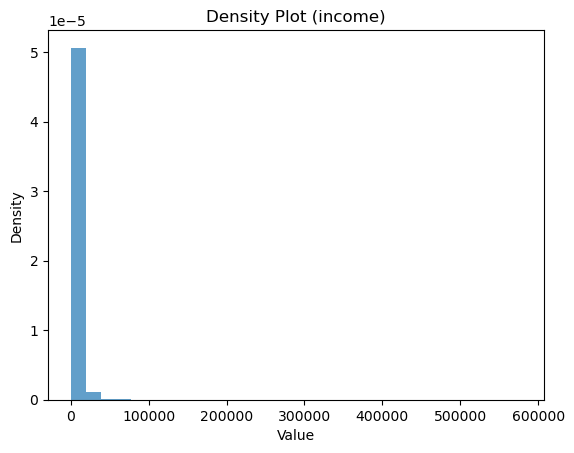

In [214]:
plot_pdf('income', data=df)

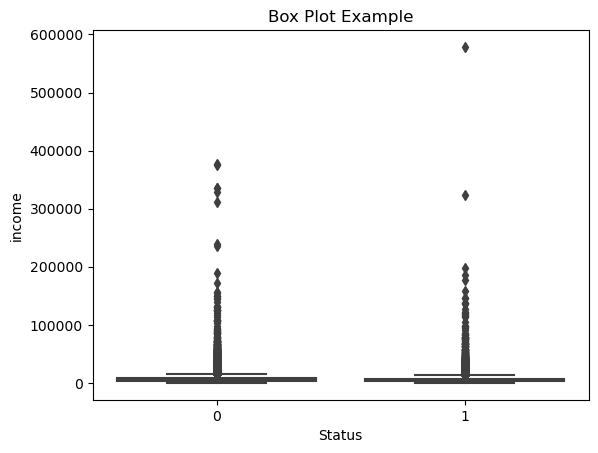

In [215]:
box_plot('income', data=df)

In [216]:
one_way_anova('income', data=df)

Reject the null hypothesis. There is a significant difference in income across Status.


In [217]:
df = standardize('income', data=df)

#### Credit Type

In [218]:
df['credit_type'].nunique()

4

In [219]:
is_na('credit_type', data=df)

Total Na Values for credit_type is 0


In [220]:
variable_count('credit_type', data=df)

Variable Count for each feature:
credit_type
CIB     48152
CRIF    43901
EQUI    15298
EXP     41319
Name: credit_type, dtype: int64


In [221]:
crosstab('credit_type', data=df)

Status           0      1
credit_type              
CIB          40542   7610
CRIF         36774   7127
EQUI             1  15297
EXP          34714   6605


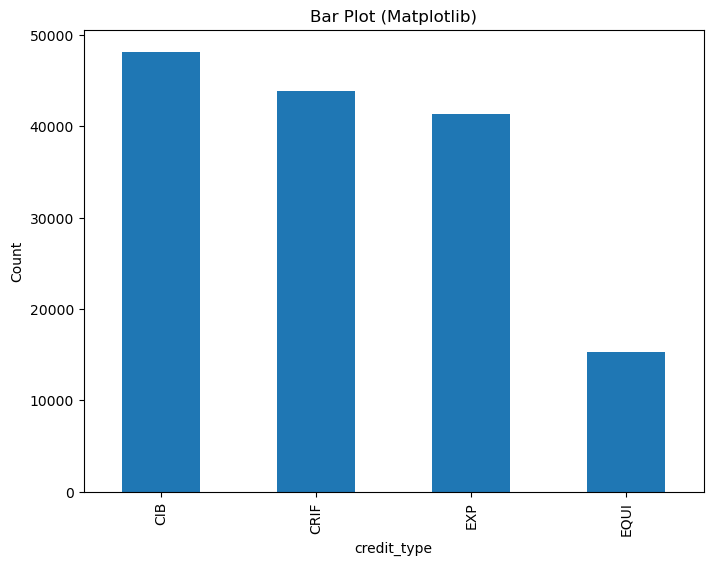

In [222]:
bar_plot('credit_type', data=df)

In [223]:
chi_square_test('credit_type', data=df)

Reject the null hypothesis. There is a significant association between credit_type and Status.


In [224]:
df = get_dummies('credit_type', data=df)

In [225]:
categorical_varibles.append('credit_type')

#### Credit Score

In [226]:
is_na('Credit_Score', data=df)

Total Na Values for Credit_Score is 0


In [227]:
df['Credit_Score'].describe()

count    148670.000000
mean        699.789103
std         115.875857
min         500.000000
25%         599.000000
50%         699.000000
75%         800.000000
max         900.000000
Name: Credit_Score, dtype: float64

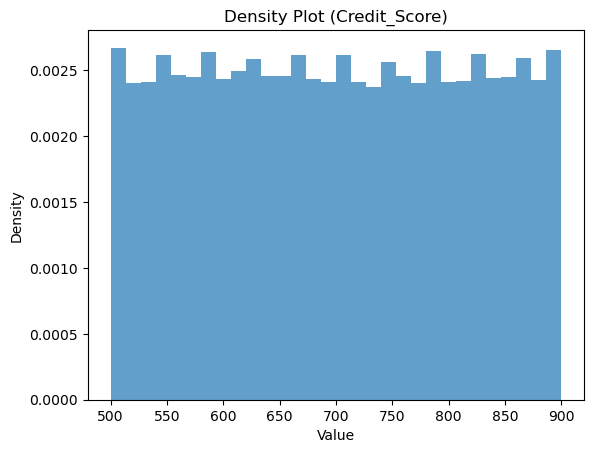

In [228]:
plot_pdf('Credit_Score', data=df)

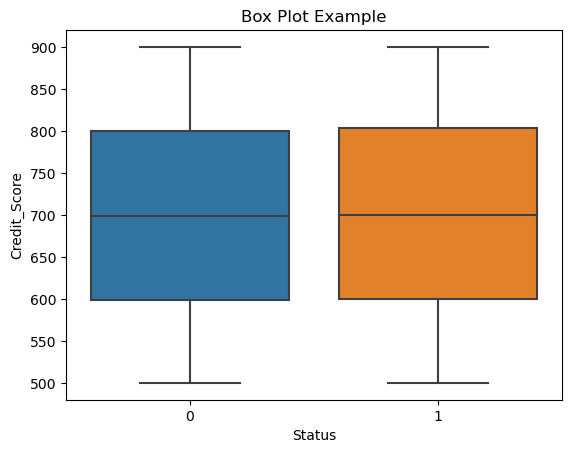

In [229]:
box_plot('Credit_Score', data=df)

In [230]:
one_way_anova('Credit_Score', data=df)

Fail to reject the null hypothesis. There is no significant difference in Credit_Score across Status.


In [231]:
df.drop(columns=['Credit_Score'], inplace=True)

#### Income

In [232]:
is_na('income', data=df)

Total Na Values for income is 0


In [233]:
df['income'].describe()

count    1.486700e+05
mean    -1.729878e-16
std      1.000000e+00
min     -1.106501e+00
25%     -4.964048e-01
50%     -1.532259e-01
75%      2.090184e-01
max      9.081777e+01
Name: income, dtype: float64

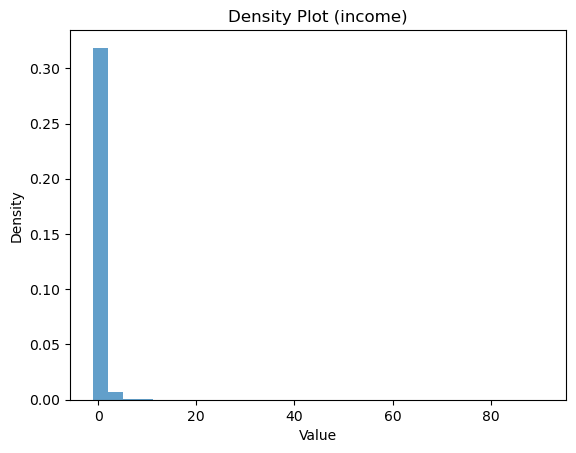

In [234]:
plot_pdf('income', data=df)

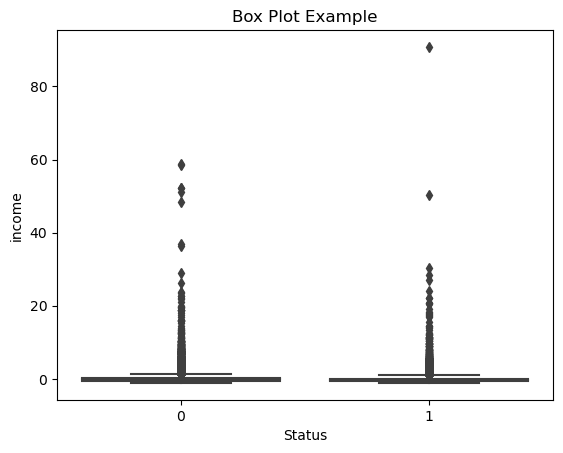

In [235]:
box_plot('income', data=df)

In [236]:
one_way_anova('income', data=df)

Reject the null hypothesis. There is a significant difference in income across Status.


In [237]:
df = standardize('income', data=df)

In [238]:
numerical_varibles.append('income')

#### Co-Applicant Credit Type

In [239]:
df['co-applicant_credit_type'].nunique()

2

In [240]:
is_na('co-applicant_credit_type', data=df)

Total Na Values for co-applicant_credit_type is 0


In [241]:
variable_count('co-applicant_credit_type', data=df)

Variable Count for each feature:
co-applicant_credit_type
CIB    74392
EXP    74278
Name: co-applicant_credit_type, dtype: int64


In [242]:
crosstab('co-applicant_credit_type', data=df)

Status                        0      1
co-applicant_credit_type              
CIB                       60679  13713
EXP                       51352  22926


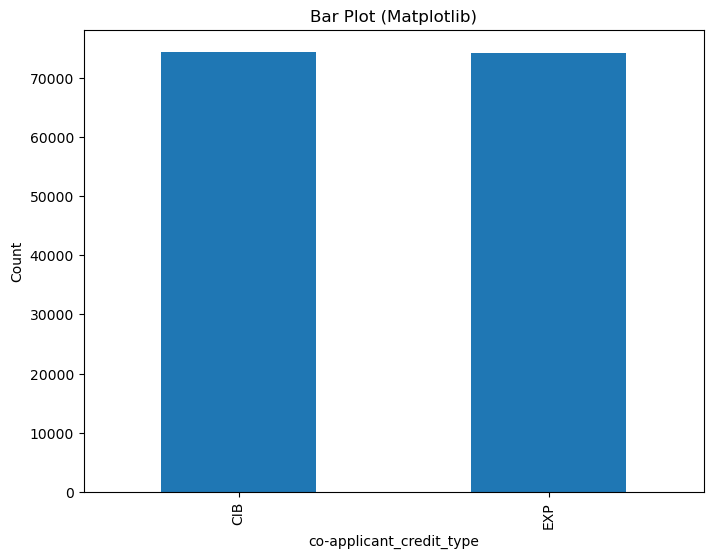

In [243]:
bar_plot('co-applicant_credit_type', data=df)

In [244]:
chi_square_test('co-applicant_credit_type', data=df)

Reject the null hypothesis. There is a significant association between co-applicant_credit_type and Status.


In [245]:
df['co-applicant_credit_type'] = df['co-applicant_credit_type'].replace({'CIB':1, 'EXP':0})

In [246]:
binary_varibles.append('co-applicant_credit_type')

#### Age

In [247]:
df['age']

0         25-34
1         55-64
2         35-44
3         45-54
4         25-34
          ...  
148665    55-64
148666    25-34
148667    45-54
148668    55-64
148669    45-54
Name: age, Length: 148670, dtype: object

In [248]:
df['age'].nunique()

7

In [249]:
df['age']

0         25-34
1         55-64
2         35-44
3         45-54
4         25-34
          ...  
148665    55-64
148666    25-34
148667    45-54
148668    55-64
148669    45-54
Name: age, Length: 148670, dtype: object

In [250]:
is_na('age', data=df)

Total Na Values for age is 200


In [251]:
df['age'] = df['age'].fillna(value=df['age'].mode()[0])

In [252]:
is_na('age', data=df)

Total Na Values for age is 0


In [253]:
variable_count('age', data=df)

Variable Count for each feature:
age
25-34    19142
35-44    32818
45-54    34920
55-64    32534
65-74    20744
<25       1337
>74       7175
Name: age, dtype: int64


In [254]:
crosstab('age', data=df)

Status      0     1
age                
25-34   14894  4248
35-44   25509  7309
45-54   26371  8549
55-64   24112  8422
65-74   15173  5571
<25       950   387
>74      5022  2153


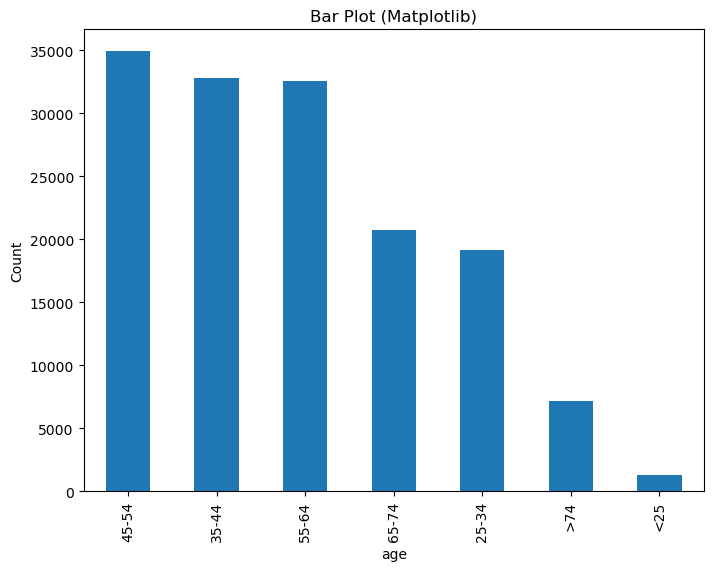

In [255]:
bar_plot('age', data=df)

In [256]:
chi_square_test('age', data=df)

Reject the null hypothesis. There is a significant association between age and Status.


In [257]:
age_range_dict = {
    "<25": 1,
    "25-34": 2,
    "35-44": 3,
    "45-54": 4,
    "55-64": 5,
    "65-74": 6,
    ">74": 7
}

df['age'] = df['age'].replace(age_range_dict)

In [258]:
binary_varibles.append('age')

#### Submission Of Application

In [259]:
df['submission_of_application'].nunique()

2

In [260]:
is_na('submission_of_application', data=df)

Total Na Values for submission_of_application is 200


In [261]:
df['submission_of_application'] = df['submission_of_application'].fillna(value=df['submission_of_application'].mode()[0])

In [262]:
is_na('submission_of_application', data=df)

Total Na Values for submission_of_application is 0


In [263]:
variable_count('submission_of_application', data=df)

Variable Count for each feature:
submission_of_application
not_inst    52656
to_inst     96014
Name: submission_of_application, dtype: int64


In [264]:
crosstab('submission_of_application', data=df)

Status                         0      1
submission_of_application              
not_inst                   43430   9226
to_inst                    68601  27413


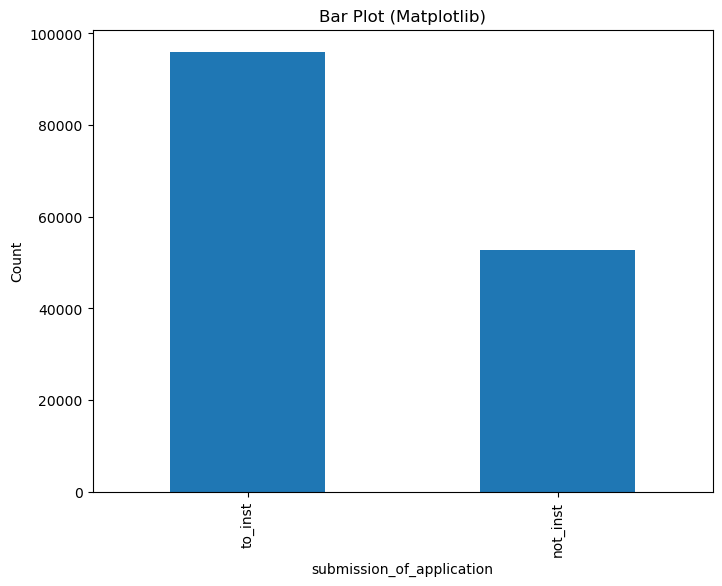

In [265]:
bar_plot('submission_of_application', data=df)

In [266]:
chi_square_test('submission_of_application', data=df)

Reject the null hypothesis. There is a significant association between submission_of_application and Status.


In [267]:
df['submission_of_application'] = df['submission_of_application'].replace({'to_inst':1, 'not_inst':0})

#### LTV

In [268]:
is_na('LTV', data=df)

Total Na Values for LTV is 15098


In [269]:
df = fillna_numerical('LTV', data=df)

In [270]:
is_na('LTV', data=df)

Total Na Values for LTV is 0


In [271]:
df['LTV'].describe()

count    148670.000000
mean         73.106410
std          37.898968
min           0.967478
25%          63.297872
50%          76.291468
75%          84.722222
max        7831.250000
Name: LTV, dtype: float64

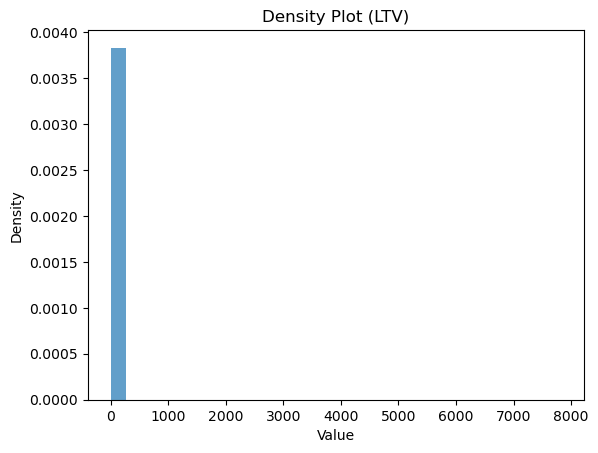

In [272]:
plot_pdf('LTV', data=df)

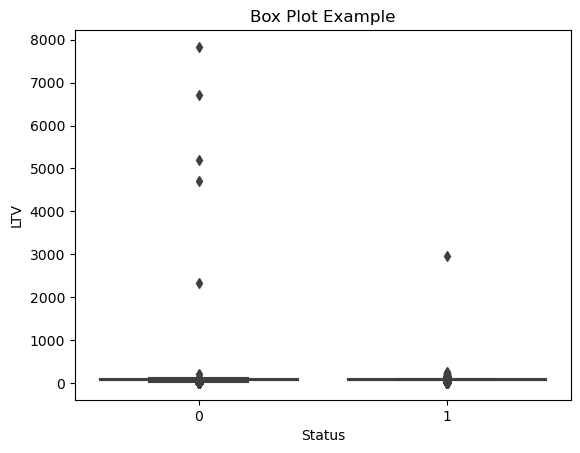

In [273]:
box_plot('LTV', data=df)

In [274]:
one_way_anova('LTV', data=df)

Reject the null hypothesis. There is a significant difference in LTV across Status.


In [275]:
df = standardize('LTV', data=df)

In [276]:
numerical_varibles.append('LTV')

#### Region

In [277]:
df['Region'].nunique()

4

In [278]:
is_na('Region', data=df)

Total Na Values for Region is 0


In [279]:
variable_count('Region', data=df)

Variable Count for each feature:
Region
North         74722
North-East     1235
central        8697
south         64016
Name: Region, dtype: int64


In [280]:
crosstab('Region', data=df)

Status          0      1
Region                  
North       57901  16821
North-East    859    376
central      6302   2395
south       46969  17047


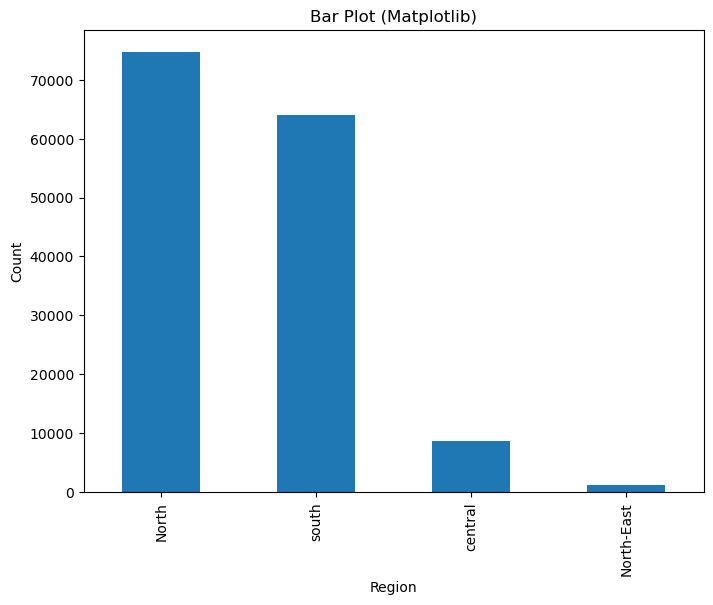

In [281]:
bar_plot('Region', data=df)

In [282]:
chi_square_test('Region', data=df)

Reject the null hypothesis. There is a significant association between Region and Status.


In [283]:
df = get_dummies('Region', data=df)

In [284]:
categorical_varibles.append('Region')

#### Security Type

In [285]:
df['Security_Type'].nunique()

2

In [286]:
is_na('Security_Type', data=df)

Total Na Values for Security_Type is 0


In [287]:
variable_count('Security_Type', data=df)

Variable Count for each feature:
Security_Type
Indriect        33
direct      148637
Name: Security_Type, dtype: int64


In [288]:
crosstab('Security_Type', data=df)

Status              0      1
Security_Type               
Indriect            0     33
direct         112031  36606


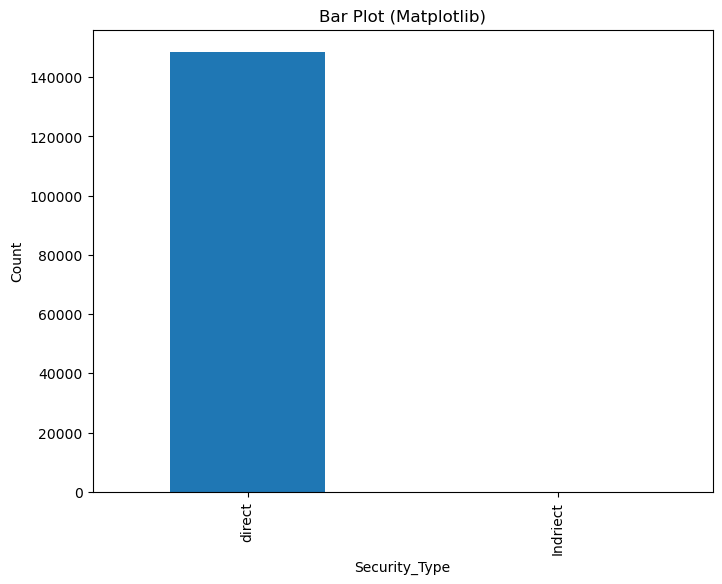

In [289]:
bar_plot('Security_Type', data=df)

In [290]:
chi_square_test('Security_Type', data=df)

Reject the null hypothesis. There is a significant association between Security_Type and Status.


In [291]:
df['Security_Type'] = df['Security_Type'].replace({'direct':0, 'Indriect':1})

In [292]:
binary_varibles.append('Security_Type')

#### dtir1

In [293]:
is_na('dtir1', data=df)

Total Na Values for dtir1 is 24121


In [294]:
df = fillna_numerical('dtir1', data=df)

In [295]:
is_na('dtir1', data=df)

Total Na Values for dtir1 is 0


In [296]:
df['dtir1'].describe()

count    148670.000000
mean         37.918361
std           9.670434
min           5.000000
25%          33.000000
50%          39.597324
75%          44.000000
max          61.000000
Name: dtir1, dtype: float64

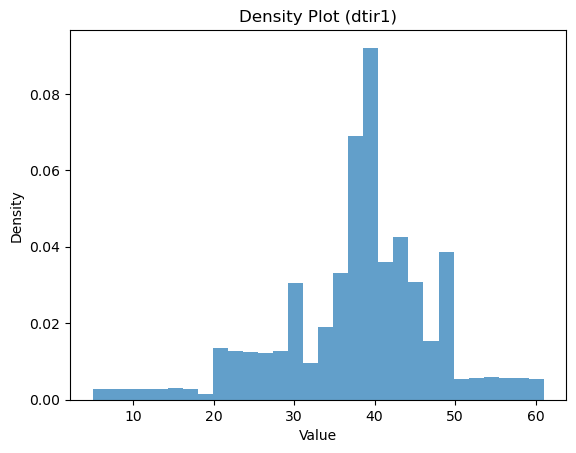

In [297]:
plot_pdf('dtir1', data=df)

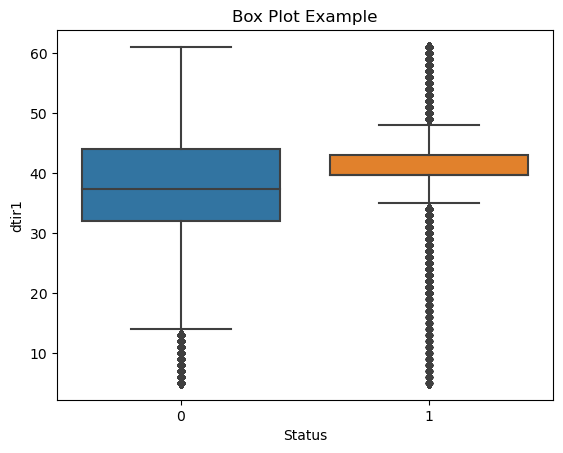

In [298]:
box_plot('dtir1', data=df)

In [299]:
one_way_anova('dtir1', data=df)

Reject the null hypothesis. There is a significant difference in dtir1 across Status.


In [300]:
df = standardize('dtir1', data=df)

In [301]:
numerical_varibles.append('dtir1')

#### Heatmap

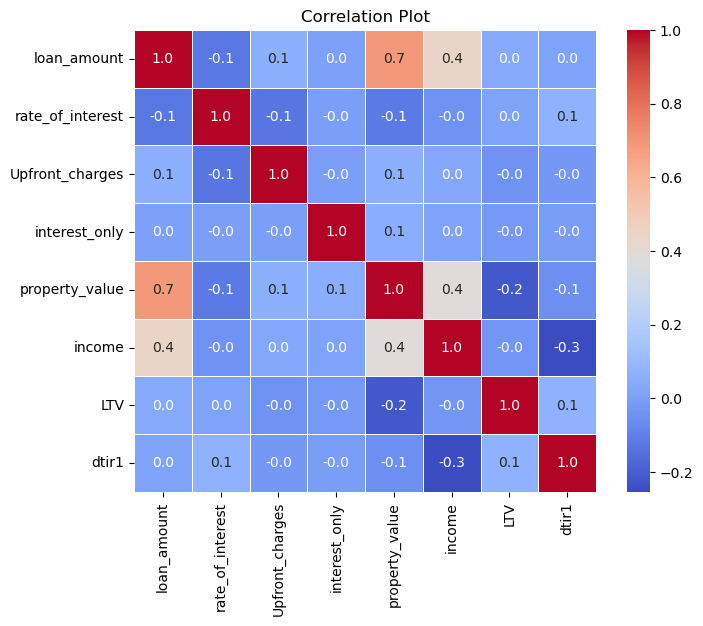

In [302]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['loan_amount', 'rate_of_interest', 'Upfront_charges', 'interest_only', 'property_value', 
 'income', 'LTV', 'dtir1']].corr(), cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5, square=True)
# Set title
plt.title('Correlation Plot')

# Show the plot
plt.show()

### SMOTE Analysis - Synthethic Data Generation for Minority Class.

* As our dataset is highly imbalanced we will generate new data for minority class using **SMOTE**

In [303]:
from imblearn.over_sampling import SMOTE

y = df['Status']
X = df.drop(columns=['Status'])

In [304]:
y.value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [305]:
# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

In [306]:
y_resampled.value_counts()

Status
1    112031
0    112031
Name: count, dtype: int64

* Now we have a balanced dataset.

### Clustering Analysis

In [307]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/Users/shri/Documents/programming_environments/pytorch_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


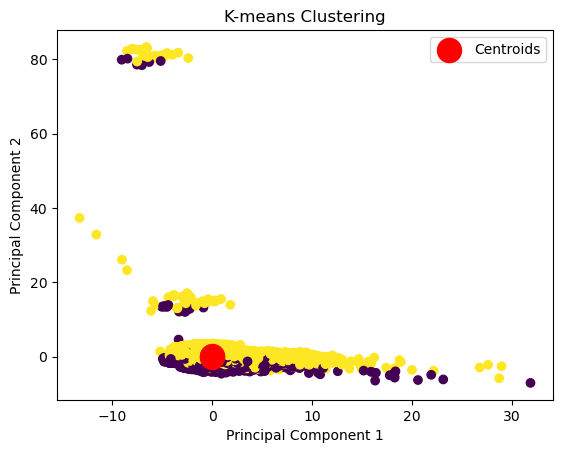

In [308]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_resampled)

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2)  # You can choose the number of clusters you want
labels = kmeans.fit_predict(data_scaled)

# Plot the clusters using the first two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Principal Component Analysis

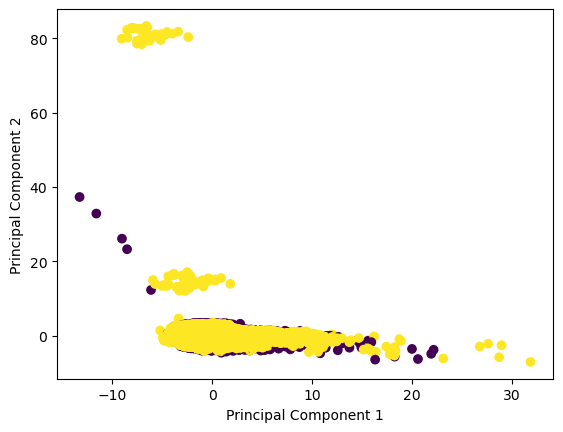

In [309]:
# Plot the Data using the first two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_resampled, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [310]:
numerical_varibles

['loan_amount',
 'rate_of_interest',
 'Upfront_charges',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [311]:
binary_varibles

['loan_limit',
 'approv_in_adv',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'Secured_by',
 'co-applicant_credit_type',
 'age',
 'Security_Type']

In [312]:
categorical_varibles

['Gender',
 'loan_type',
 'loan_purpose',
 'term',
 'occupancy_type',
 'total_units',
 'credit_type',
 'Region']

In [313]:
len(numerical_varibles)+len(binary_varibles)+len(categorical_varibles)

28